In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re


In [0]:
from google.colab import files
uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore (2).csv


In [0]:
df = pd.read_csv('googleplaystore.csv')

In [0]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# **Cleaning Data**

**Part 1 : Rating**

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [0]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [0]:
df.Rating

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: float64

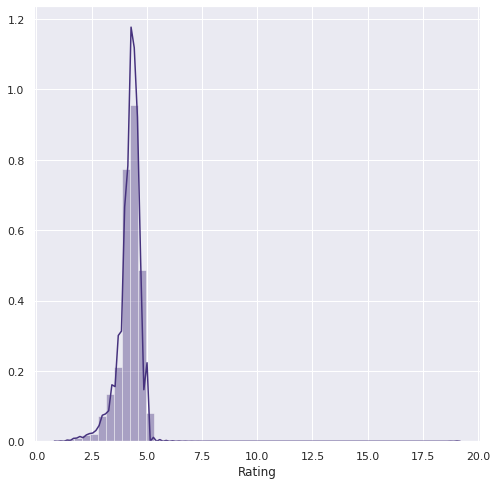

In [0]:
fig,ax = plt.subplots()
fig.set_size_inches(8,8)
sns.distplot(df.Rating)

In [0]:
df.Rating.median()

4.3

In [0]:
df['Rating'] = df.Rating.replace(np.nan,4.3)

In [0]:
df.Rating

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    4.3
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: float64

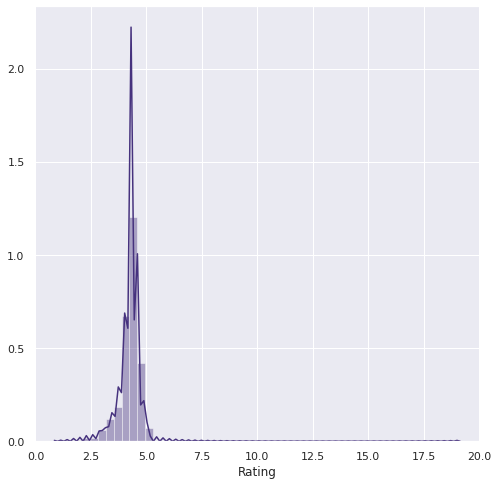

In [0]:
fig,ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.distplot(df.Rating)

In [0]:
df = df[df.Rating <= 5]

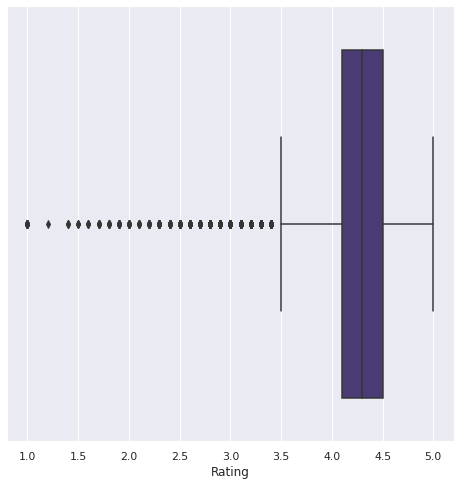

In [0]:
fig,ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.set(style="darkgrid", palette="viridis", color_codes=True)
sns.boxplot(df.Rating)

In [0]:
df = df.dropna()

In [0]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

**Part 2 : Size**

In [0]:
df.Size.value_counts()

Varies with device    1694
11M                    197
12M                    196
14M                    193
13M                    191
                      ... 
454k                     1
506k                     1
475k                     1
160k                     1
173k                     1
Name: Size, Length: 457, dtype: int64

In [0]:
df.Size = df.Size.replace('Varies with device','')

In [0]:
df['Size'] = df.Size.apply(lambda x: float(x.replace('M','') if bool(re.search('M',x)) else (0 if x == '' else float(x.replace('k',''))/1000)))

df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [0]:
df.Size.value_counts()

0.000     1694
11.000     197
12.000     196
14.000     193
13.000     191
          ... 
0.642        1
0.647        1
0.039        1
0.414        1
0.942        1
Name: Size, Length: 456, dtype: int64

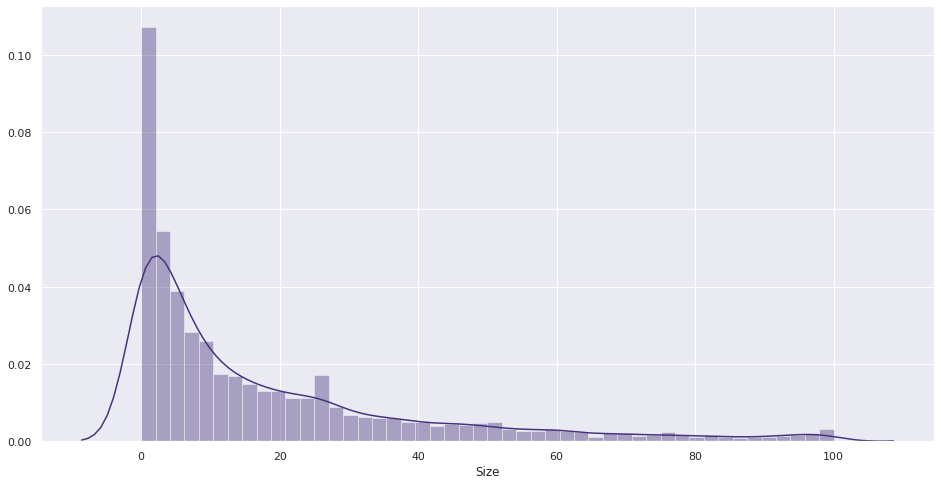

In [0]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)
sns.set(style="darkgrid", palette="viridis", color_codes=True)
sns.distplot(df.Size)

In [0]:
df.Size = df.Size.replace(0,df.Size.median())

In [0]:
df.Size.value_counts()

9.200     1727
11.000     197
12.000     196
14.000     193
13.000     191
          ... 
0.642        1
0.647        1
0.039        1
0.414        1
0.942        1
Name: Size, Length: 455, dtype: int64

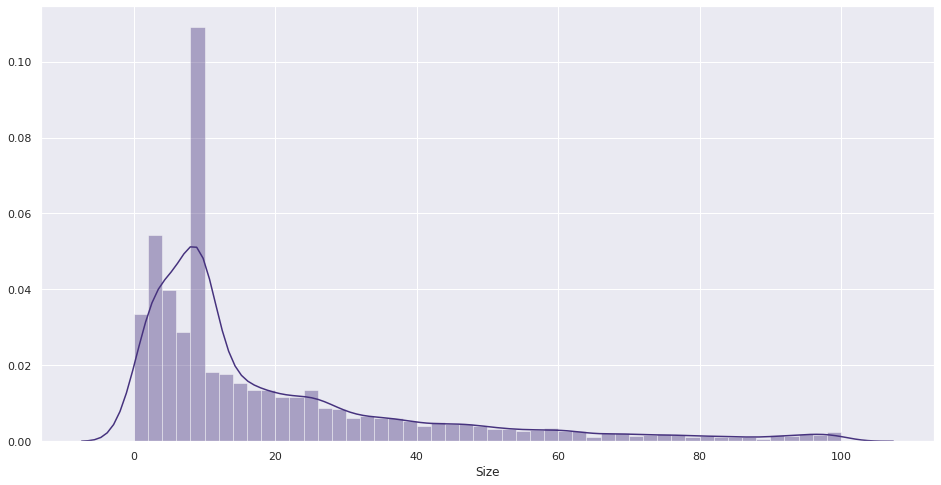

In [0]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)
sns.set(style="darkgrid", palette="viridis", color_codes=True)
sns.distplot(df.Size)

**Part 3 : Installs**

In [0]:
df.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10829, dtype: object

In [0]:
df.Installs.value_counts()

1,000,000+        1578
10,000,000+       1252
100,000+          1169
10,000+           1052
1,000+             905
5,000,000+         752
100+               718
500,000+           538
50,000+            478
5,000+             476
100,000,000+       409
10+                385
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Name: Installs, dtype: int64

In [0]:
df['Installs'] = df.Installs.str.replace(',' , '').str.replace('+', '').astype('int').replace(0,4)

df['Installs'].value_counts()

1000000       1578
10000000      1252
100000        1169
10000         1052
1000           905
5000000        752
100            718
500000         538
50000          478
5000           476
100000000      409
10             385
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
4               14
Name: Installs, dtype: int64

**Part 4 : Price**

In [0]:
df.Price.value_counts()

0         10032
$0.99       146
$2.99       129
$1.99        73
$4.99        72
          ...  
$4.84         1
$3.02         1
$2.56         1
$4.85         1
$19.40        1
Name: Price, Length: 92, dtype: int64

In [0]:
df['Price'] = df.Price.str.replace('$' , '').astype('float')

df.Price.value_counts(ascending=False)

0.00    10032
0.99      146
2.99      129
1.99       73
4.99       72
        ...  
1.20        1
1.59        1
2.56        1
1.61        1
1.04        1
Name: Price, Length: 92, dtype: int64

# **Data Analysis**

**Part 1** **: Category and Size Analysis**

Analyzing which category has the most apps with biggest size. As we can see, the **game category** has the most apps with the biggest size up to 40MB, while **the communication category** has the smallest applications up to 17MB.

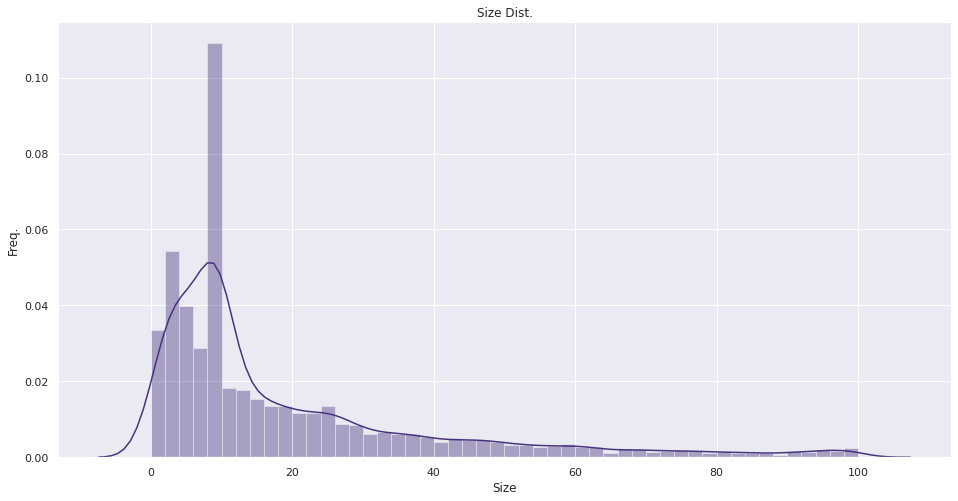

In [0]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)
sns.set(style="whitegrid", palette="Purples", color_codes=True)

ax = sns.distplot(df.Size).set(title='Size Dist.',ylabel='Freq.')

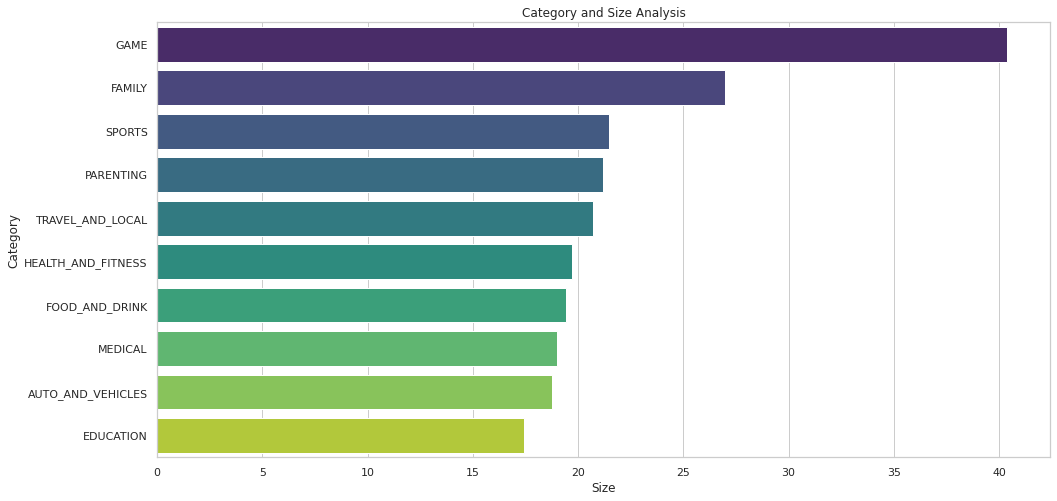

In [0]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)

cat_size = df.groupby('Category')['Size'].mean().reset_index().sort_values('Size',ascending=False)

ax = sns.barplot(y = 'Category', x='Size', data=cat_size[:10], palette = 'viridis').set(title='Category and Size Analysis')

**Part 2 : Price Distribution Analysis**

Analyzing the price distribution on Google PlayStore. From the dataframe we can see that there are many junk apps, it will be better if those junk apps is dropped. Then there are various prices, but **the price range starts from 0 (free apps) to 3 dollars.**

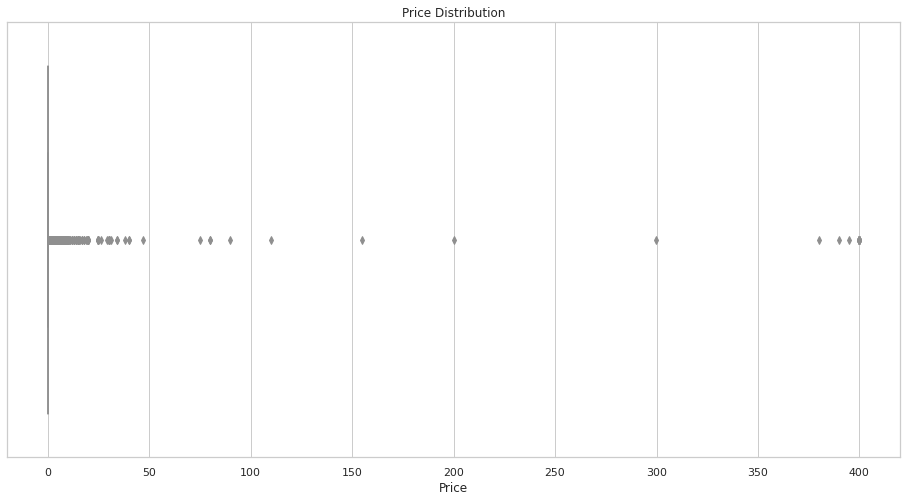

In [0]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)

ax = sns.boxplot(df.Price).set(title='Price Distribution')

In [0]:
df[df.Price>=100]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1.500,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.800,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.700,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2.600,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.700,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.900,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22.000,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,0.965,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [0]:
df = df[df.Price<200]

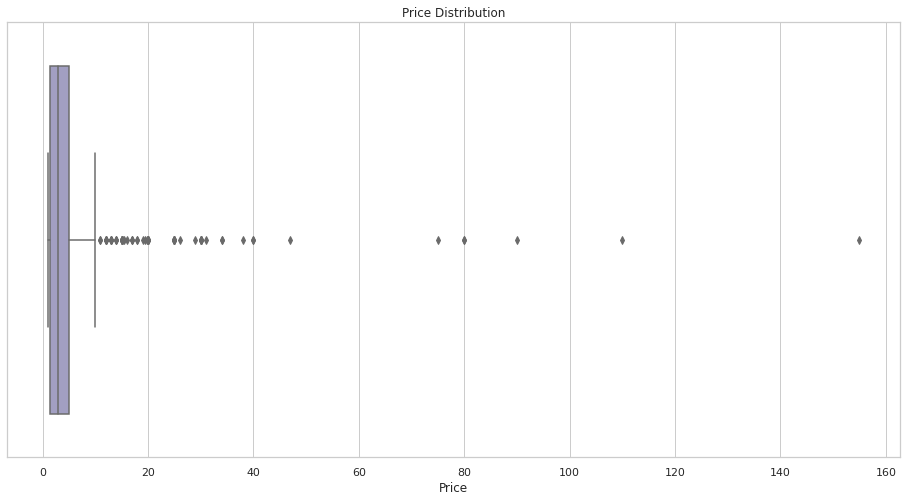

In [0]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)

ax = sns.boxplot(df[df.Price>0]['Price'], palette='Purples').set(title='Price Distribution')

In [0]:
df[df.Price>0]['Price'].median()

2.99

**Part 3 : The Most Installed Category**

Analyzing which category is installed the most. From the graph below we know that **communication** is the most installed category, followed by **social, video players, and productivity category**.

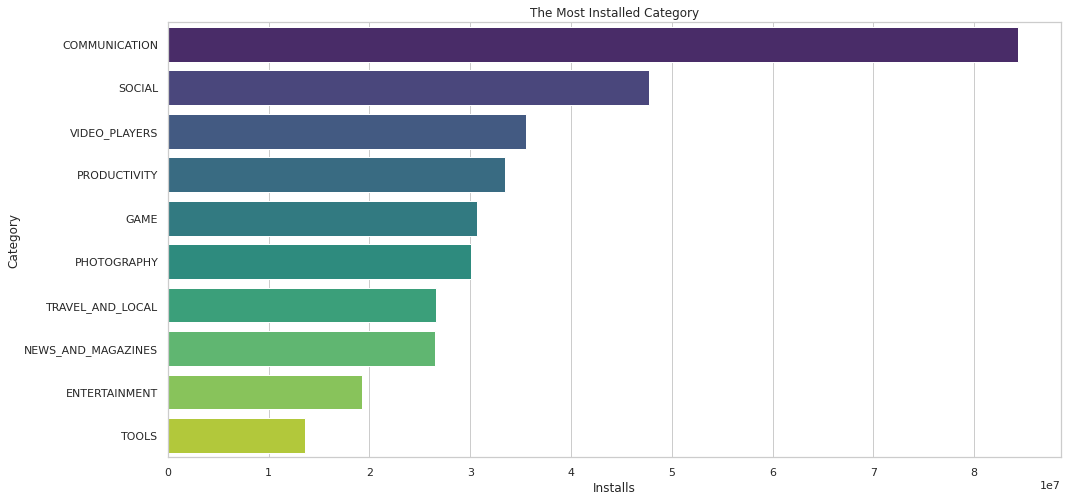

In [0]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)

cat_installs = df.groupby('Category')['Installs'].mean().reset_index().sort_values('Installs',ascending=False)

ax = sns.barplot(y = 'Category', x='Installs', data=cat_installs[:10], palette = 'viridis').set(title='The Most Installed Category')

**Part 4 : Rating, Price, and Size**

Analyzing the correlation between size with rating of apps and price with rating of apps. The first graph below shows us that **apps with less than 10MB size have high ratings** and the second graph shows that **apps with high ratings have the price range from 0 dollar up to approximately 20 dollars.**

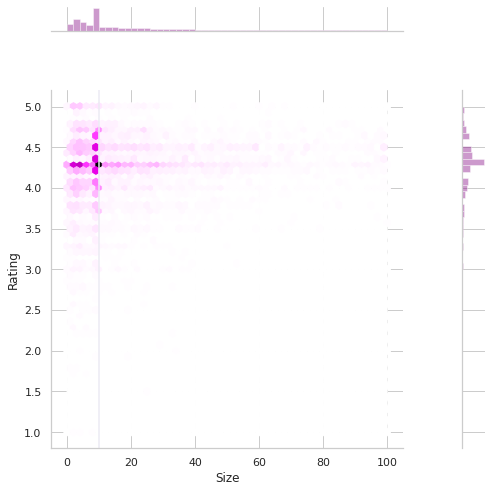

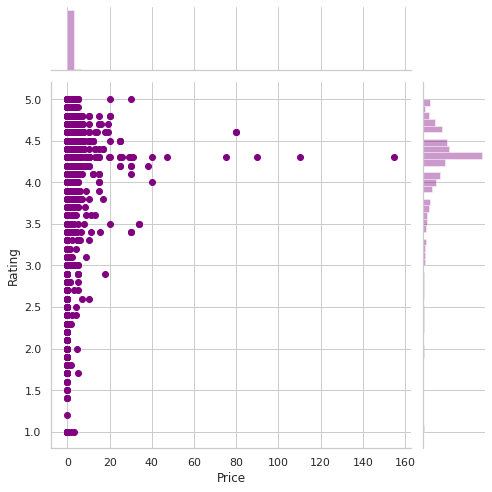

In [0]:
plt1 = sns.jointplot(x = 'Size', y = 'Rating', data = df, kind = 'hex', height=7, color='Purple', space=2.5)
plt1.ax_joint.axvline(x=10)
plt2 = sns.jointplot(x = 'Price', y = 'Rating', data = df, height=7, color='Purple')

**Part 5 : The Category that Has the Most Apps**

Analyzing which category that has the most apps on Google Playstore. The graph shows that** family category has the most apps** and followed by **game and tools**, while **the beauty category has the fewest apps**.

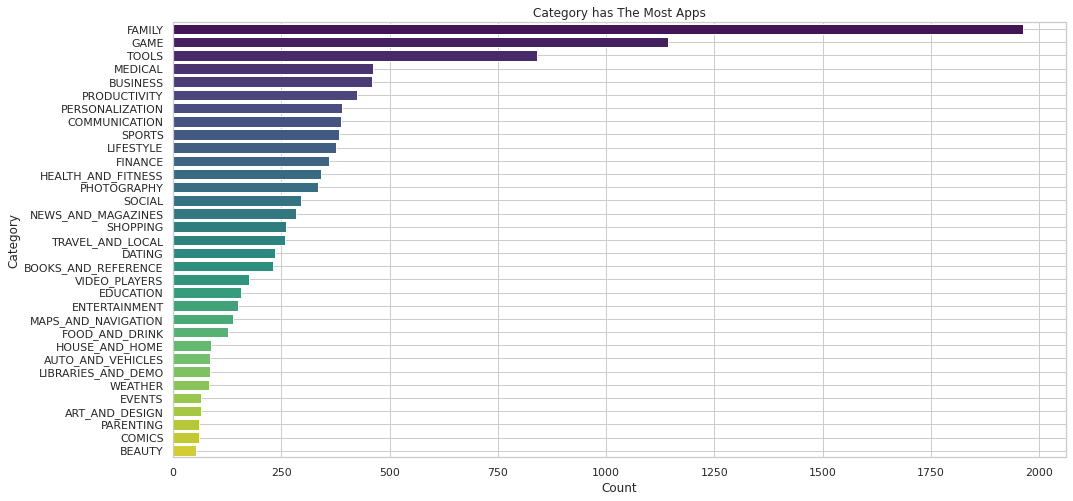

In [0]:
sns.barplot(y=df.Category.value_counts().index, x=df.Category.value_counts(), palette='viridis')
plt.title('Category has The Most Apps')
plt.xlabel('Count')
plt.ylabel('Category')
plt.rcParams["figure.figsize"] = [8,8]
plt.grid(True)